In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop('Id', axis=1)

In [4]:
df.shape

(150, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.duplicated().sum()

3

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

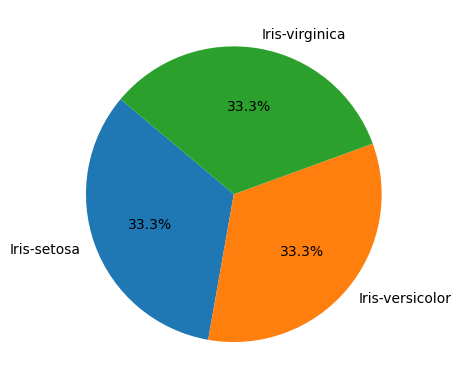

In [10]:
count=df['Species'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.show()

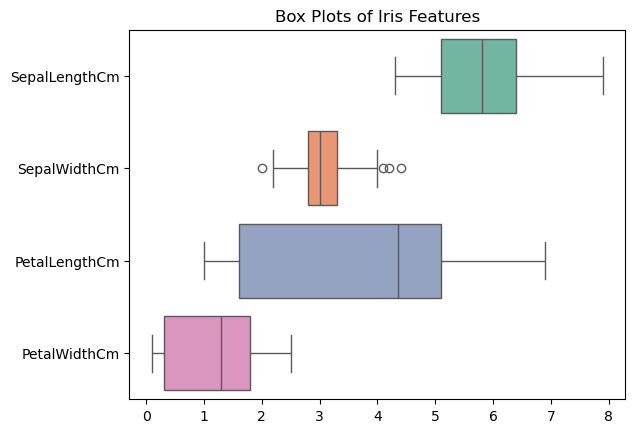

In [11]:
sns.boxplot(df, orient='h', palette='Set2')
plt.title('Box Plots of Iris Features')
plt.show()

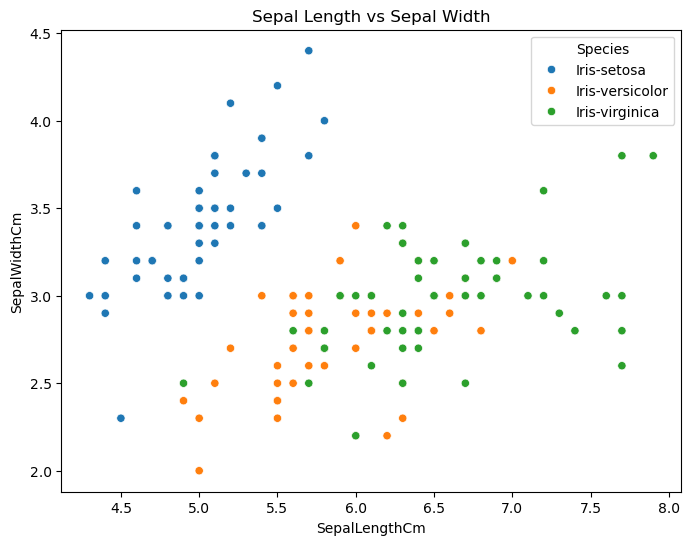

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()


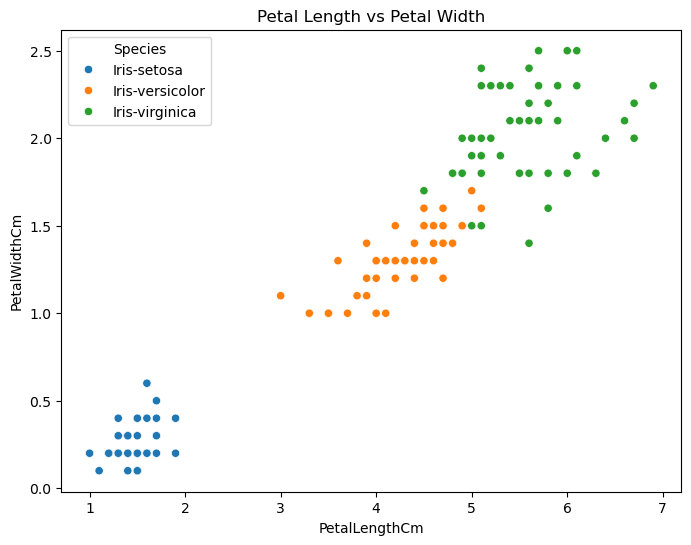

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

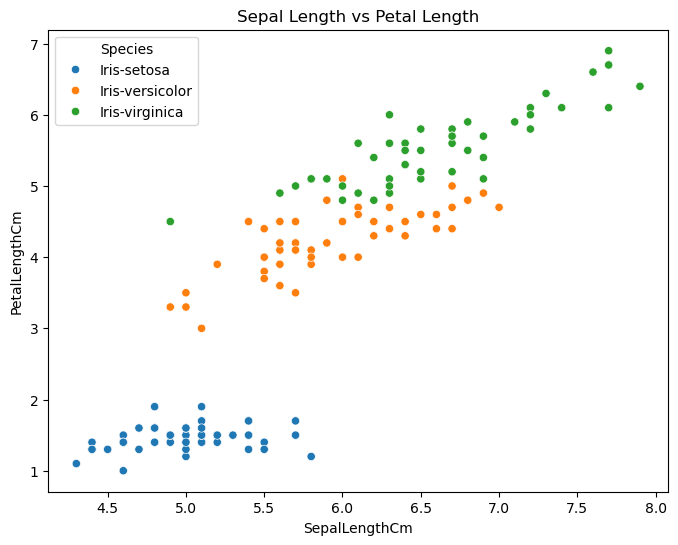

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.title('Sepal Length vs Petal Length')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

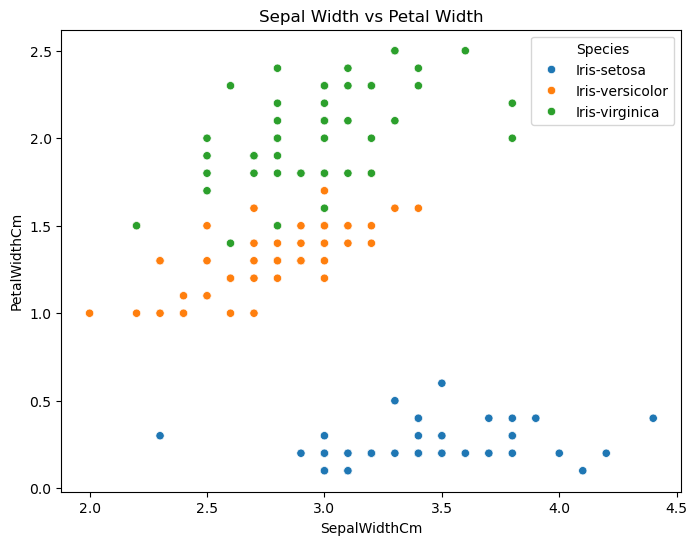

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species')
plt.title('Sepal Width vs Petal Width')
plt.show

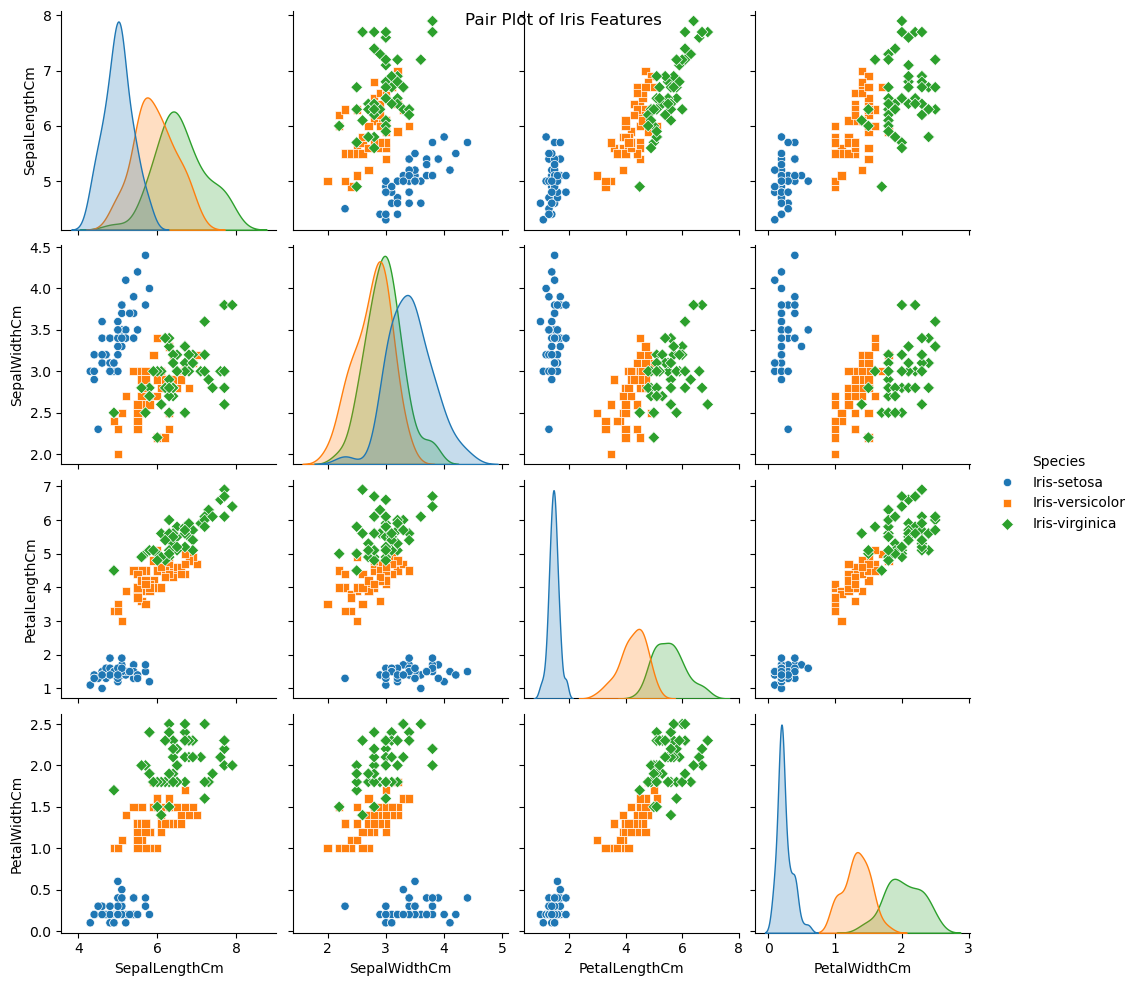

In [16]:
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Features')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['Species']=enco.fit_transform(df['Species'])

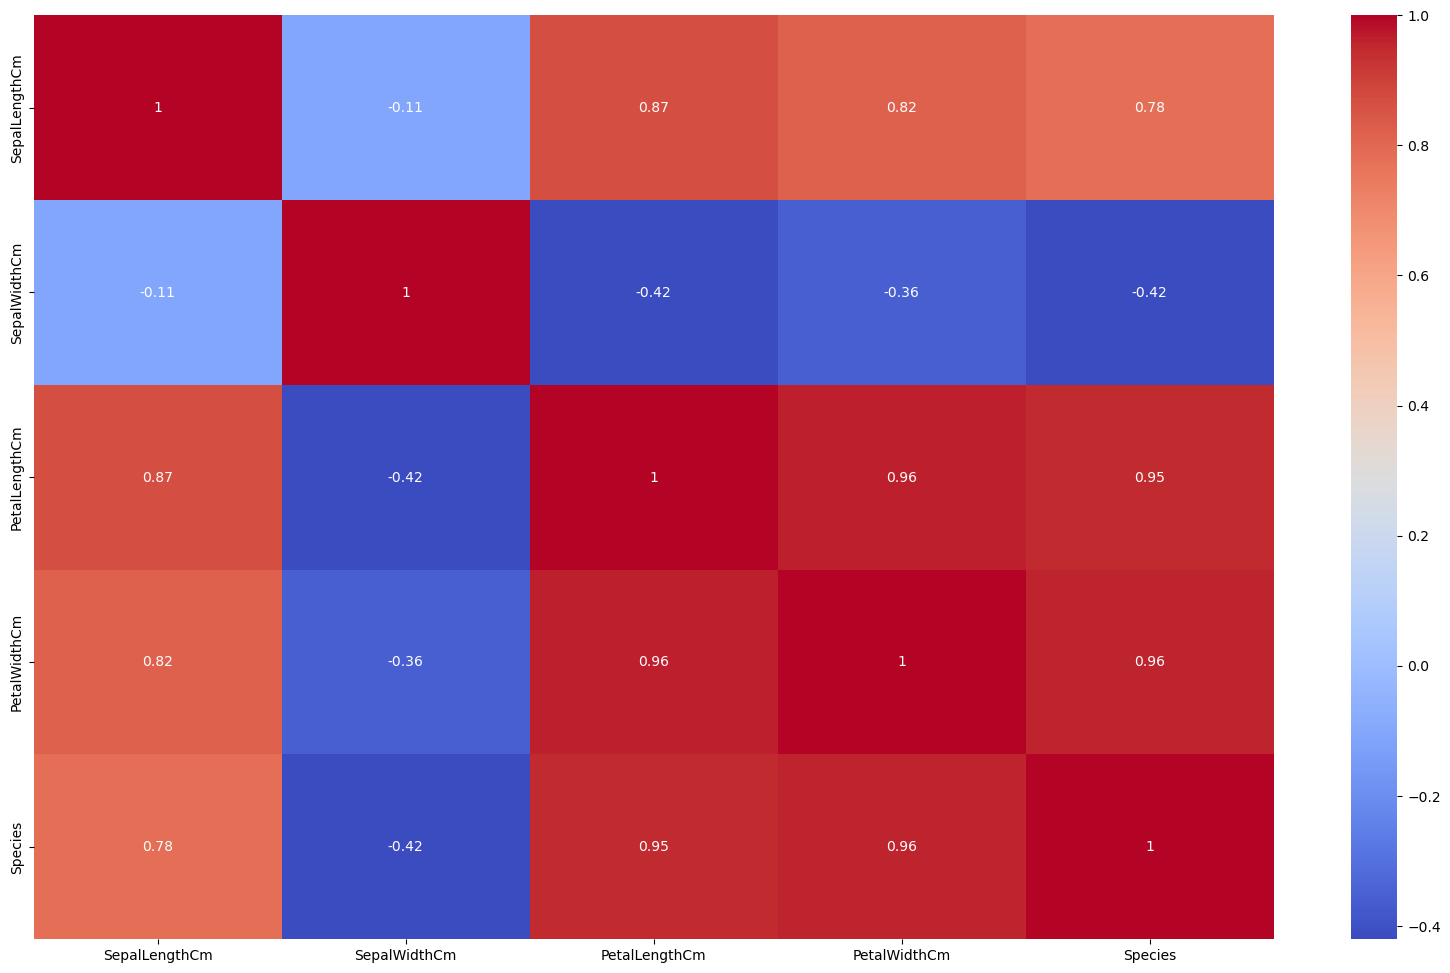

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
x=df.drop('Species', axis=1)
y=df['Species']

In [20]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x=sca.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [24]:
yhat_train=lreg.predict(x_train)
yhat_test=lreg.predict(x_test)

In [25]:
print(classification_report(y_train, yhat_train))
print()
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      0.95      0.96        42
           2       0.95      0.98      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
print(confusion_matrix(y_train, yhat_train))
print()
print(confusion_matrix(y_test, yhat_test))

[[36  0  0]
 [ 0 40  2]
 [ 0  1 41]]

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


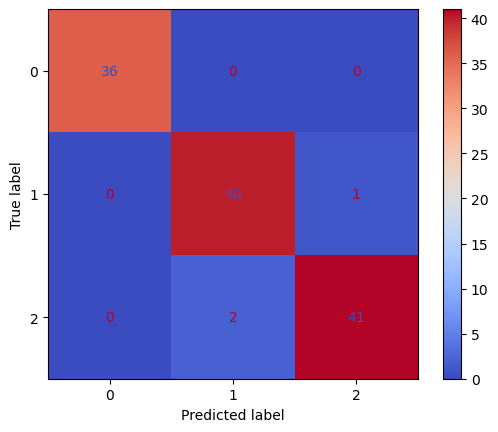

In [27]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

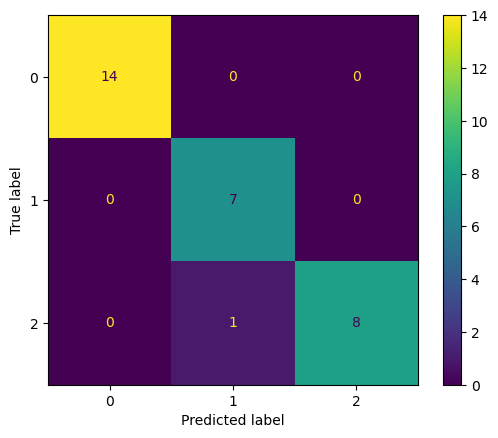

In [28]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
yhat_train=rfc.predict(x_train)
yhat_test=rfc.predict(x_test)

In [31]:
print(classification_report(y_train, yhat_train))
print()
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [32]:
print(confusion_matrix(y_train, yhat_train))
print()
print(confusion_matrix(y_test, yhat_test))

[[36  0  0]
 [ 0 42  0]
 [ 0  0 42]]

[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


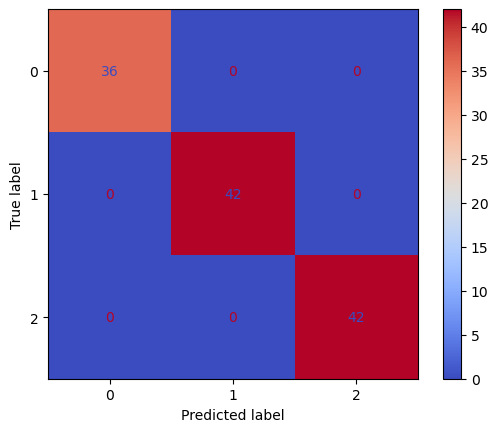

In [33]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

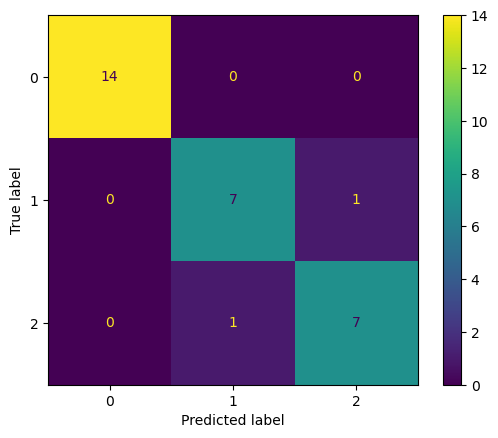

In [34]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [36]:
yhat_train=svc.predict(x_train)
yhat_test=svc.predict(x_test)

In [37]:
print(classification_report(y_train, yhat_train))
print()
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.95      0.95        42
           2       0.95      0.95      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [38]:
print(confusion_matrix(y_train, yhat_train))
print()
print(confusion_matrix(y_test, yhat_test))

[[36  0  0]
 [ 0 40  2]
 [ 0  2 40]]

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


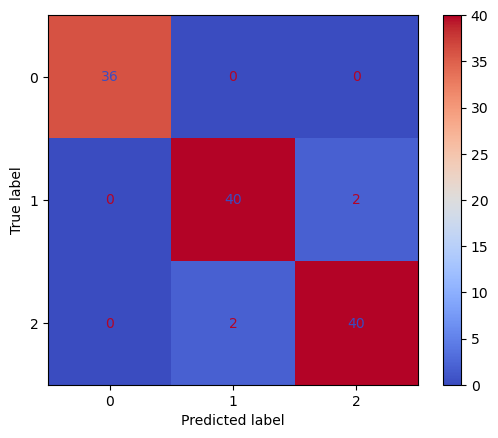

In [39]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

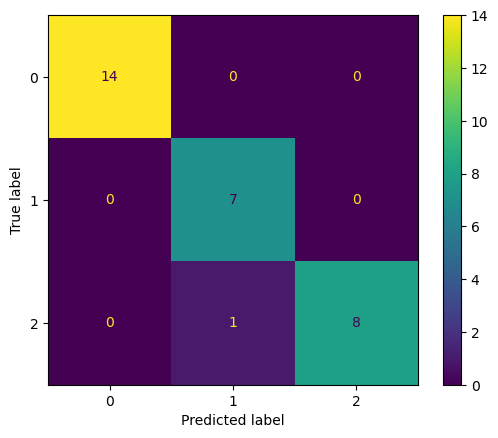

In [40]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

ALL MODELS HAVE AN ACCURACY OF 97%